In [ ]:
# https://drive.google.com/file/d/1JVgy2yXUOREkzRdCeWjep626uvvF94pP/view

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_url = "https://drive.google.com/uc?id=1JVgy2yXUOREkzRdCeWjep626uvvF94pP"
df = pd.read_csv(csv_url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [4]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [5]:
df.dtypes

Artist           object
Track Name       object
Popularity        int64
Duration (ms)     int64
Track ID         object
dtype: object

In [11]:
# 1.Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do
# the needful.

df.isnull().sum()
# Artist           0
# Track Name       0
# Popularity       0
# Duration (ms)    0
# Track ID         0
# dtype: int64
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
# output:Number of duplicate rows: 27
df.drop_duplicates(inplace=True)
count = df.duplicated().sum()
print(f"Number of duplicate rows after deleting: {count}")
# output:Number of duplicate rows after deleting: 0

Number of duplicate rows: 0
Number of duplicate rows after deleting: 0


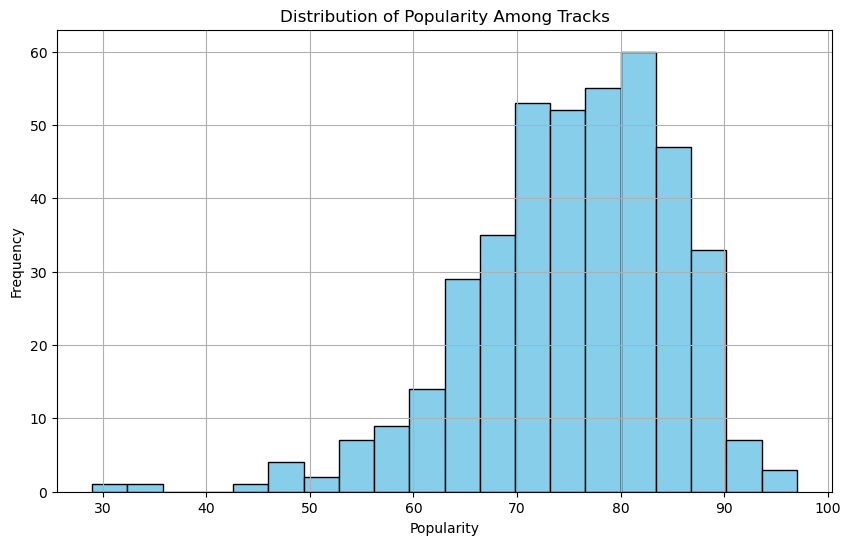

In [12]:
# 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))  
plt.hist(df['Popularity'], bins=20, color='skyblue', edgecolor='black')  
plt.title('Distribution of Popularity Among Tracks')  
plt.xlabel('Popularity') 
plt.ylabel('Frequency')  
plt.grid(True)  
plt.show() 


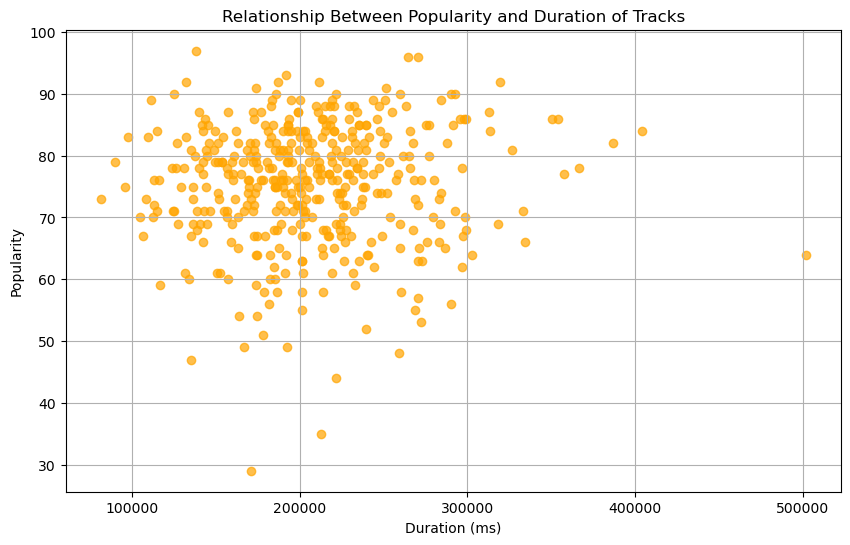

In [13]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))  
plt.scatter(df['Duration (ms)'], df['Popularity'], color='orange', alpha=0.7)  
plt.title('Relationship Between Popularity and Duration of Tracks')  
plt.xlabel('Duration (ms)')  
plt.ylabel('Popularity')  
plt.grid(True)  
plt.show()  


The artist with the highest number of tracks is: Drake


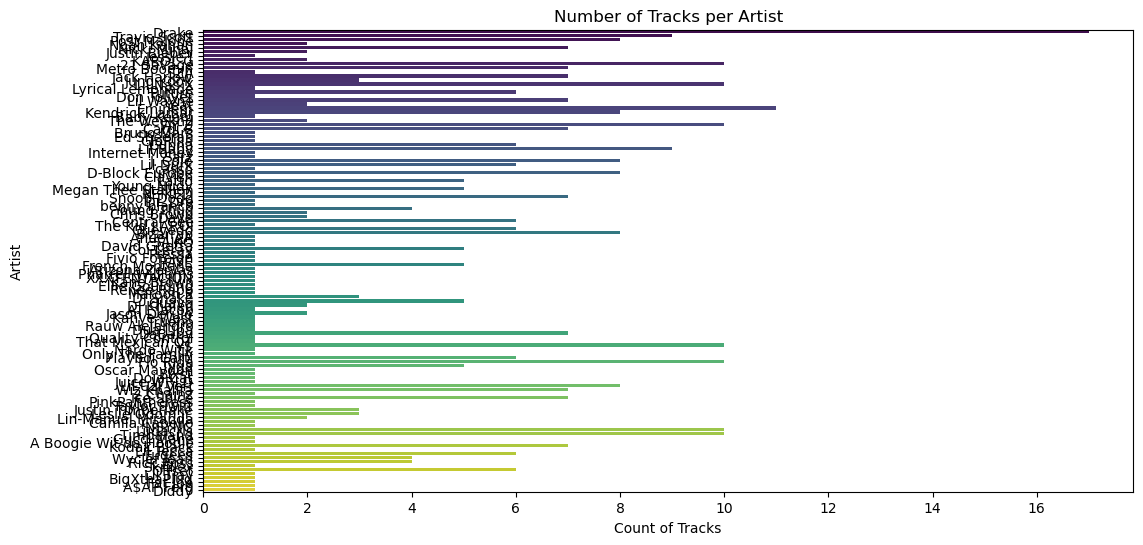

In [16]:
# 4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist 
# using a countplot. 

top_artist = df['Artist'].value_counts().idxmax()  
top_artist_count = df['Artist'].value_counts().max()  
print(f"The artist with the highest number of tracks is: {top_artist}")
# output:The artist with the highest number of tracks is: Drake

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(y='Artist', data=df, palette='viridis')  
plt.title('Number of Tracks per Artist')  
plt.xlabel('Count of Tracks')  
plt.ylabel('Artist') 
plt.show()  

In [17]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

least_popular_tracks = df.sort_values(by='Popularity').head(5)
least_popular_tracks_info = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]
print(least_popular_tracks_info)

# output:
#              Artist                     Track Name  Popularity
# 207          Pressa  Attachments (feat. Coi Leray)          29
# 231   Justin Bieber                     Intentions          35
# 413  French Montana                Splash Brothers          44
# 225        Lil Baby                  On Me - Remix          47
# 407     Wyclef Jean      911 (feat. Mary J. Blige)          48

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [18]:
# 6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and 
# display the average popularity for each artist.

average_popularity_by_artist = df.groupby('Artist')['Popularity'].mean()
top_5_artists = average_popularity_by_artist.nlargest(5)
print(top_5_artists)

# output:Artist
# cassö           92.000000
# Trueno          89.000000
# David Guetta    87.000000
# Travis Scott    86.555556
# ¥$              85.100000
# Name: Popularity, dtype: float64

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [19]:
# 7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

average_popularity_by_artist = df.groupby('Artist')['Popularity'].mean()
top_5_artists = average_popularity_by_artist.nlargest(5)
most_popular_tracks = []

for artist in top_5_artists.index:
    artist_tracks = df[df['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    most_popular_tracks.append((artist, most_popular_track['Track Name'], most_popular_track['Popularity']))

for artist, track_name, popularity in most_popular_tracks:
    print(f"Artist: {artist}, Track: {track_name}, Popularity: {popularity}")
# output:
# Artist: cassö, Track: Prada, Popularity: 92
# Artist: Trueno, Track: Mamichula - con Nicki Nicole, Popularity: 89
# Artist: David Guetta, Track: Baby Don't Hurt Me, Popularity: 87
# Artist: Travis Scott, Track: FE!N (feat. Playboi Carti), Popularity: 93
# Artist: ¥$, Track: CARNIVAL, Popularity: 96

Artist: cassö, Track: Prada, Popularity: 92
Artist: Trueno, Track: Mamichula - con Nicki Nicole, Popularity: 89
Artist: David Guetta, Track: Baby Don't Hurt Me, Popularity: 87
Artist: Travis Scott, Track: FE!N (feat. Playboi Carti), Popularity: 93
Artist: ¥$, Track: CARNIVAL, Popularity: 96


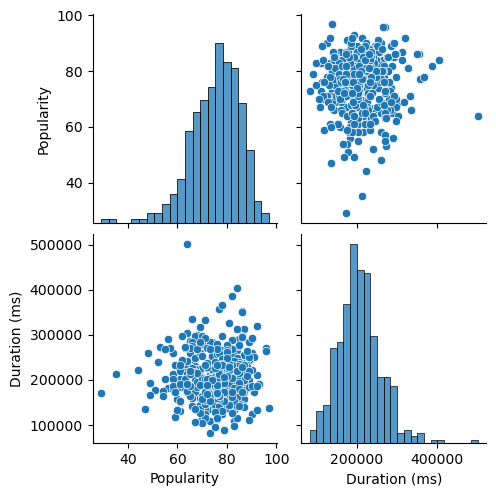

In [20]:
# 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns = ['Popularity', 'Duration (ms)']
sns.pairplot(df[numerical_columns])
plt.show()


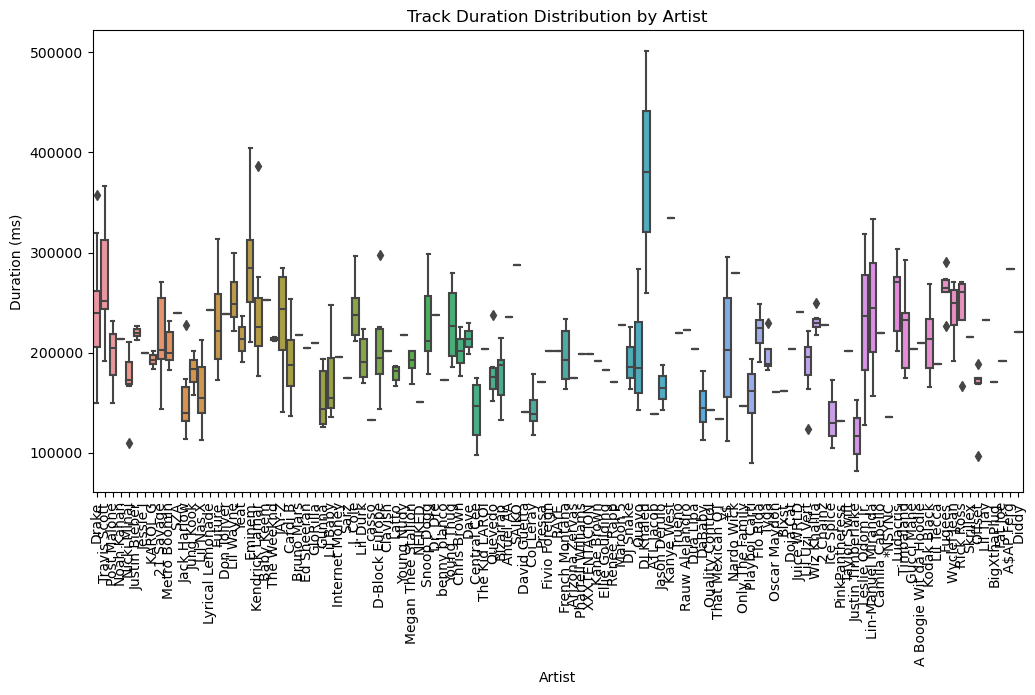

In [21]:
# 9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box 
# plot or violin plot.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.xticks(rotation=90)
plt.title('Track Duration Distribution by Artist')
plt.show()


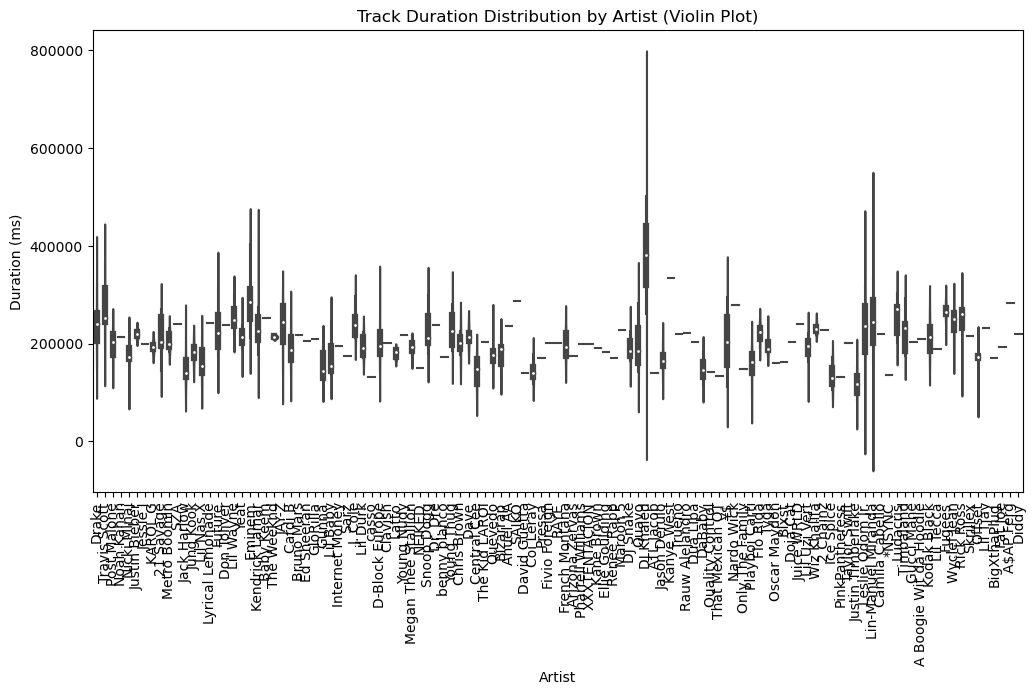

In [22]:

plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=df)
plt.xticks(rotation=90)
plt.title('Track Duration Distribution by Artist (Violin Plot)')
plt.show()


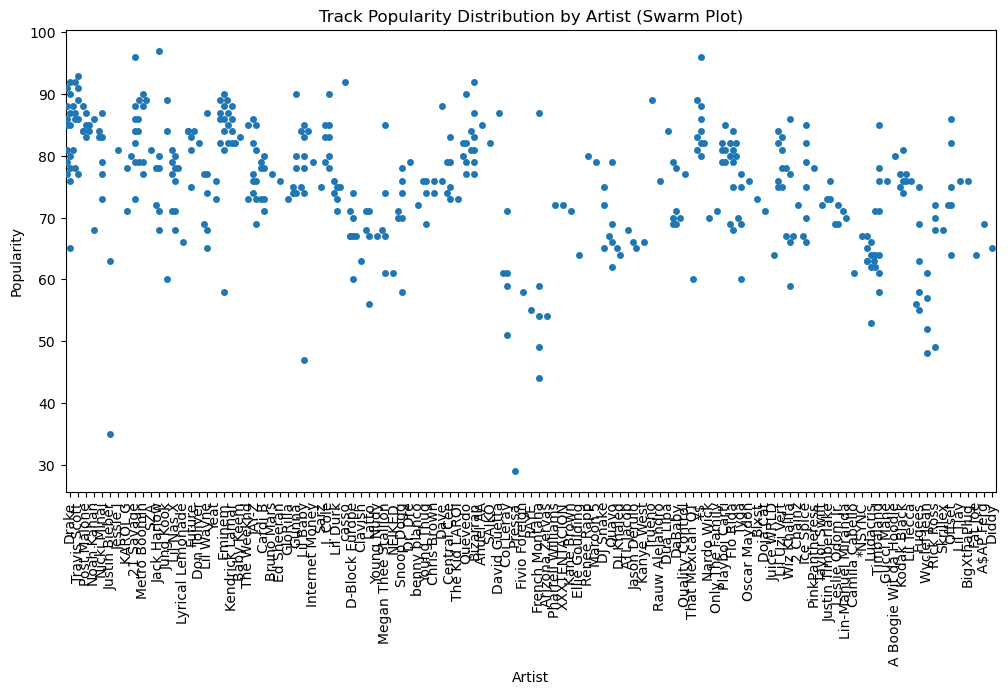

In [23]:
# 10.How does the distribution of track popularity vary for different artists? 
# Visualize this using a swarm plot or a violin plot.

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)
plt.title('Track Popularity Distribution by Artist (Swarm Plot)')
plt.show()


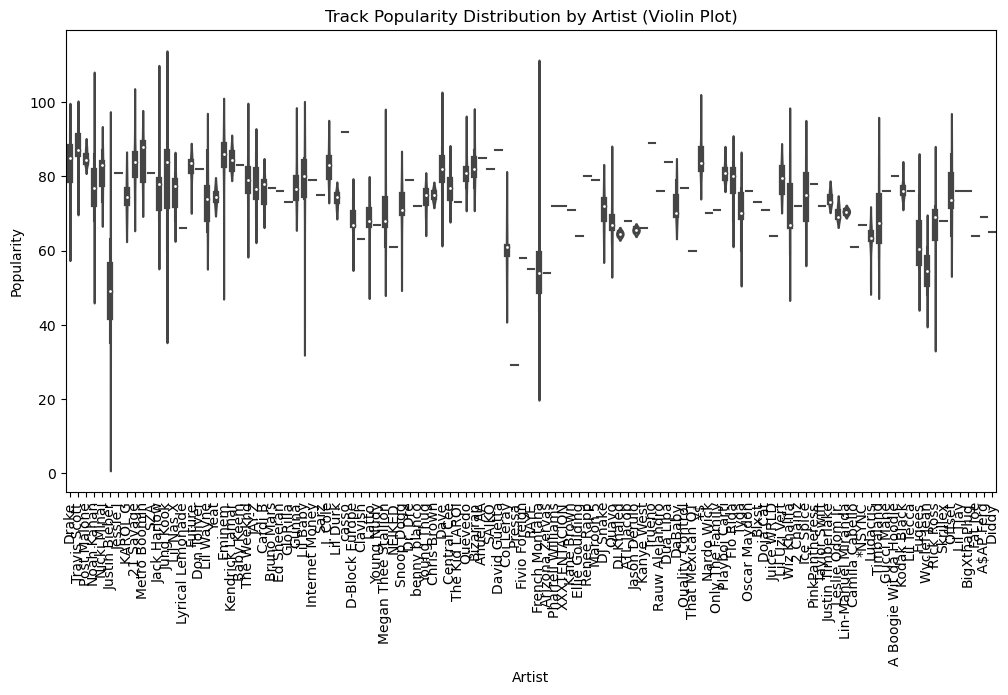

In [24]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)
plt.title('Track Popularity Distribution by Artist (Violin Plot)')
plt.show()
